In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os 
import shutil 
import glob
import numpy as np
import matplotlib.pyplot as plt
import pygrib
import pickle

#################################################################
# Default plotting parameters
FIGURESIZE=(10,6)
FONTSIZE=18
plt.rcParams['figure.figsize'] = FIGURESIZE
plt.rcParams['font.size'] = FONTSIZE
plt.rcParams['xtick.labelsize'] = FONTSIZE
plt.rcParams['ytick.labelsize'] = FONTSIZE
#################################################################

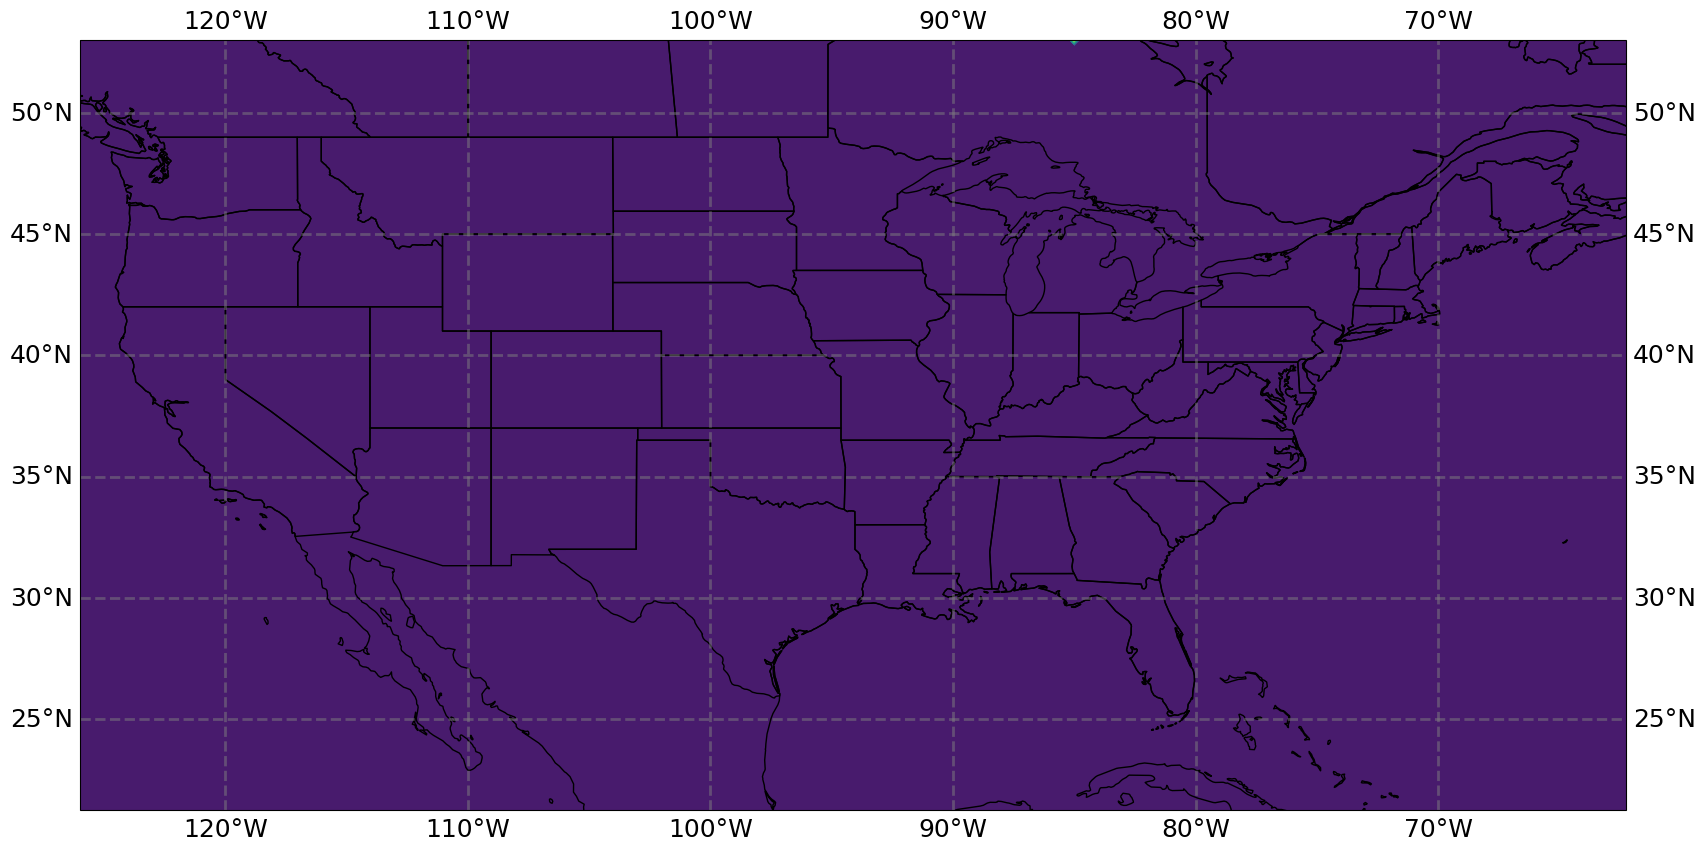

In [20]:

file = 'test.nc'

ds = xr.open_dataset(file)

lon = ds['lon']
lat = ds['lat']

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.contourf(lon,lat,ds['ice_q'][:,:,15],transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, edgecolor="black")
ax.add_feature(cfeature.STATES,edgecolor="black")
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

In [15]:



gfs_dir = '/ourdisk/hpc/ai2es/bmac87/GFS/00Z/f000/'

files = os.listdir(gfs_dir)
grbs = pygrib.open(gfs_dir+files[0])

gfs_lats_2d, gfs_lons_2d = grbs[1].latlons()
gfs_lons_1d = np.squeeze(gfs_lons_2d[0,:])
gfs_lats_1d = np.squeeze(gfs_lats_2d[:,0])

gfs_lons_1d.shape, gfs_lats_1d.shape

north_idx=148
south_idx=276
west_idx=936
east_idx=1192

boltCast_lat_1d = gfs_lats_1d[north_idx:south_idx]
boltCast_lon_1d = gfs_lons_1d[west_idx:east_idx]

boltCast_lat_2d = gfs_lats_2d[north_idx:south_idx,west_idx:east_idx]
boltCast_lon_2d = gfs_lons_2d[north_idx:south_idx,west_idx:east_idx]

gfs_orography = grbs.select(name='Orography',level=0)[0].values
static_inputs = {}
static_inputs['lat'] = boltCast_lat_2d
static_inputs['lon'] = boltCast_lon_2d
static_inputs['terrain'] = gfs_orography[north_idx:south_idx,west_idx:east_idx]
pickle.dump(static_inputs,open('static_inputs.pkl','wb'))


valid_time = grbs[1].validDate

grbindx=pygrib.index(gfs_dir+files[0],'name','typeOfLevel','level')

graupel_250 = grbindx.select(name='Graupel (snow pellets)',typeOfLevel='isobaricInhPa',level=250)[0].values[north_idx:south_idx,west_idx:east_idx]
graupel_500 = grbindx.select(name='Graupel (snow pellets)',typeOfLevel='isobaricInhPa',level=500)[0].values[north_idx:south_idx,west_idx:east_idx]
graupel_700 = grbindx.select(name='Graupel (snow pellets)',typeOfLevel='isobaricInhPa',level=700)[0].values[north_idx:south_idx,west_idx:east_idx]

ice_250 = grbindx.select(name = 'Ice water mixing ratio',typeOfLevel='isobaricInhPa',level=250)[0].values[north_idx:south_idx,west_idx:east_idx]
ice_500 = grbindx.select(name = 'Ice water mixing ratio',typeOfLevel='isobaricInhPa',level=500)[0].values[north_idx:south_idx,west_idx:east_idx]
ice_700 = grbindx.select(name = 'Ice water mixing ratio',typeOfLevel='isobaricInhPa',level=700)[0].values[north_idx:south_idx,west_idx:east_idx]

rain_250 = grbindx.select(name='Rain mixing ratio',typeOfLevel='isobaricInhPa',level=250)[0].values[north_idx:south_idx,west_idx:east_idx]
rain_500 = grbindx.select(name='Rain mixing ratio',typeOfLevel='isobaricInhPa',level=500)[0].values[north_idx:south_idx,west_idx:east_idx]
rain_700 = grbindx.select(name='Rain mixing ratio',typeOfLevel='isobaricInhPa',level=700)[0].values[north_idx:south_idx,west_idx:east_idx]

snow_250 = grbindx.select(name='Snow mixing ratio',typeOfLevel='isobaricInhPa',level=250)[0].values[north_idx:south_idx,west_idx:east_idx]
snow_500 = grbindx.select(name='Snow mixing ratio',typeOfLevel='isobaricInhPa',level=500)[0].values[north_idx:south_idx,west_idx:east_idx]
snow_700 = grbindx.select(name='Snow mixing ratio',typeOfLevel='isobaricInhPa',level=700)[0].values[north_idx:south_idx,west_idx:east_idx]

w_500 = grbindx.select(name='Geometric vertical velocity',typeOfLevel='isobaricInhPa',level=500)[0].values[north_idx:south_idx,west_idx:east_idx]
w_700 = grbindx.select(name='Geometric vertical velocity',typeOfLevel='isobaricInhPa',level=700)[0].values[north_idx:south_idx,west_idx:east_idx]

reflectivity = grbs.select(name='Maximum/Composite radar reflectivity',typeOfLevel='atmosphere',level=0)[0].values[north_idx:south_idx,west_idx:east_idx]
cape = grbs.select(name='Convective available potential energy',typeOfLevel='surface',level=0)[0].values[north_idx:south_idx,west_idx:east_idx]
lifted_idx = grbs.select(name='Surface lifted index',typeOfLevel='surface',level=0)[0].values[north_idx:south_idx,west_idx:east_idx]
print(reflectivity.shape)
print(cape.shape)
print(lifted_idx.shape)
ds = xr.Dataset(
    data_vars=dict(graupel_250 = (["lat","lon"],graupel_250),
                   graupel_500 = (["lat","lon"],graupel_500),
                   graupel_700 = (["lat","lon"],graupel_700),

                   ice_250 = (["lat","lon"],ice_250),
                   ice_500 = (["lat","lon"],ice_500),
                   ice_700 = (["lat","lon"],ice_700),

                   rain_250 = (["lat","lon"],rain_250),
                   rain_500 = (["lat","lon"],rain_500),
                   rain_700 = (["lat","lon"],rain_700),

                   snow_250 = (["lat","lon"],snow_250),
                   snow_500 = (["lat","lon"],snow_500),
                   snow_700 = (["lat","lon"],snow_700),

                   w_500 = (["lat","lon"],w_500),
                   w_700 = (["lat","lon"],w_700),

                   reflectivity = (["lat","lon"],reflectivity),
                   cape = (["lat","lon"],cape),
                   lifted_index = (["lat","lon"],lifted_idx)
    ),

    coords=dict(
        lon=(["lon"],boltCast_lon_1d),
        lat=(["lat"],boltCast_lat_1d)
        ),

    attrs=dict(
        description="Inputs into BoltCast.",
        mixing_ratio_units="kg/kg",
        refl_units="dB",
        cape_units="J/kg",
        lifted_index_units="K",
        w_units="m/s"
        )
)
ds.to_netcdf('gfs_test.nc',engine='netcdf4')




(128, 256)
(128, 256)
(128, 256)


/home/bmac87/.conda/envs/pygrib/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


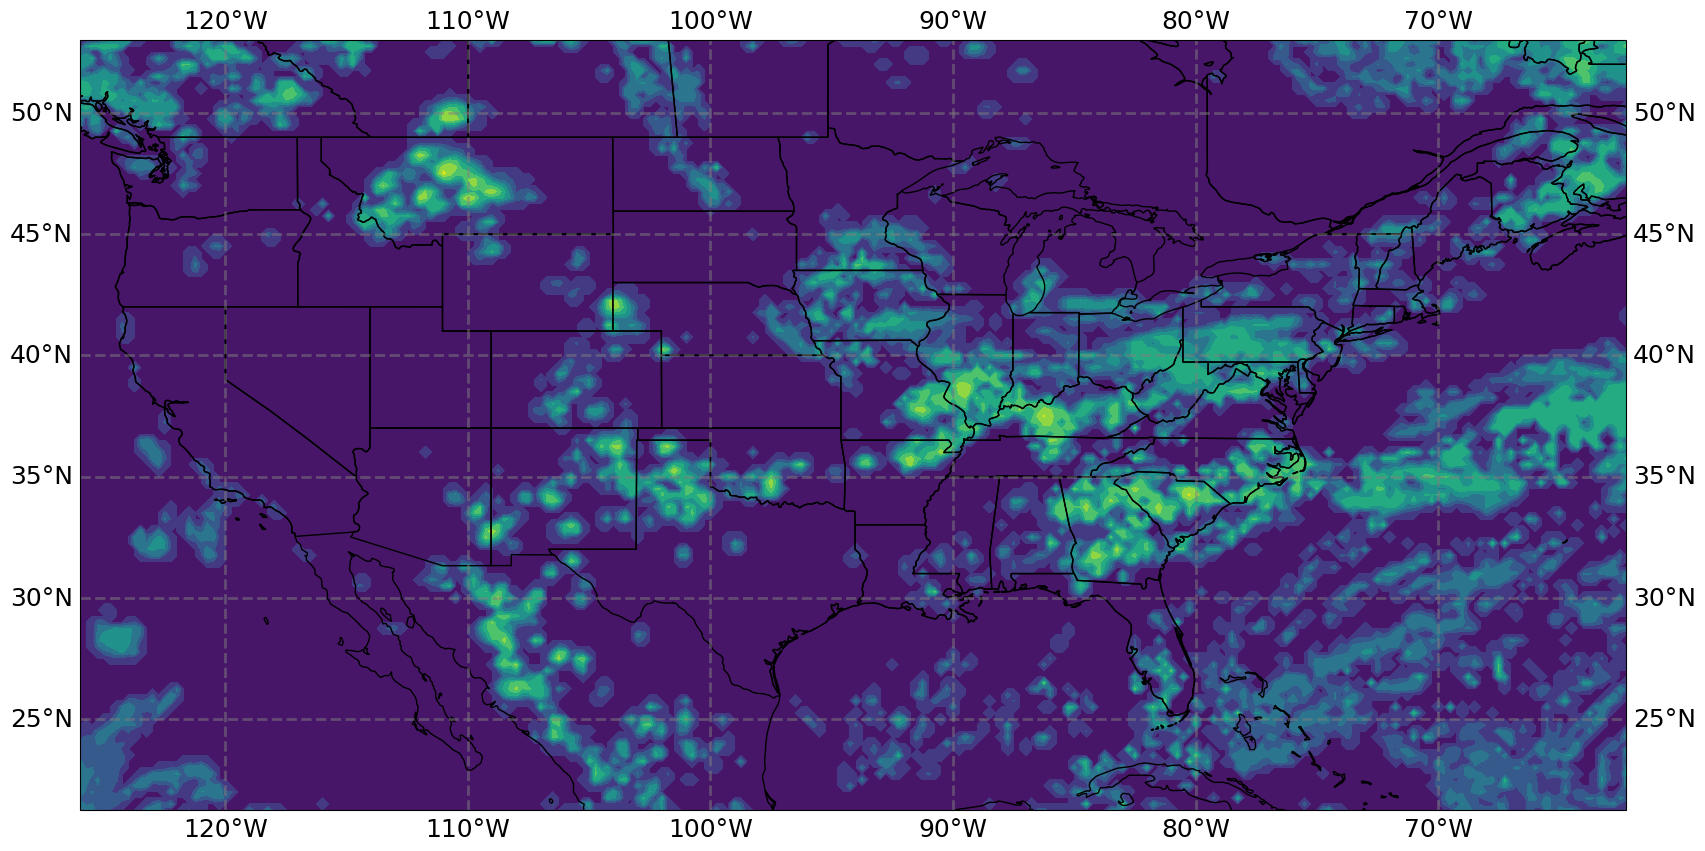

In [18]:
ds

fig = plt.figure(figsize=(20,10))
#plot the temperature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.contourf(boltCast_lon_1d,boltCast_lat_1d,reflectivity,transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, edgecolor="black")
ax.add_feature(cfeature.STATES,edgecolor="black")
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

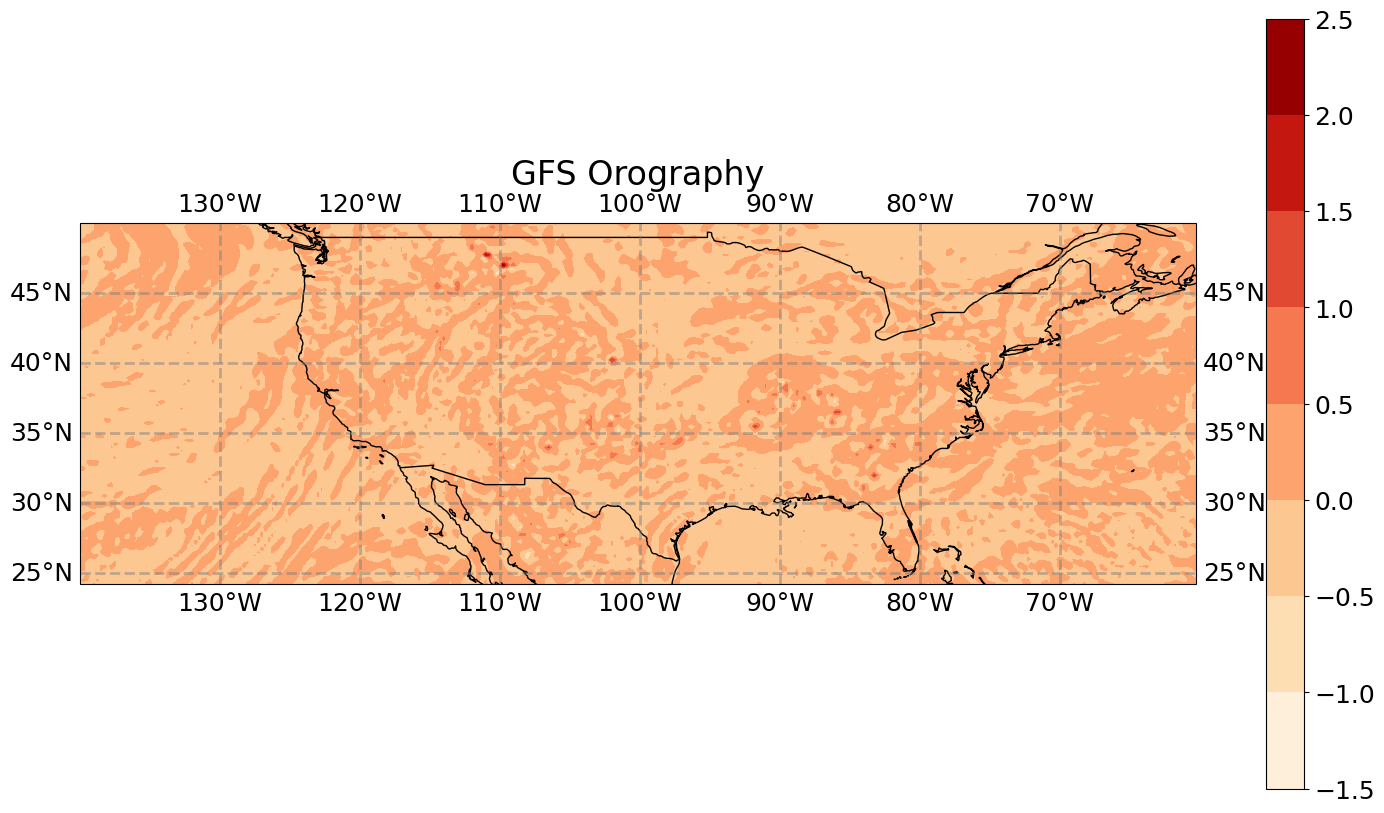

In [6]:
gfs_lons_1d = np.squeeze(gfs_lons_2d[0,:])
gfs_lats_1d = np.squeeze(gfs_lats_2d[:,0])

gfs_lons_1d.shape, gfs_lats_1d.shape

south_idx = np.where(gfs_lats_1d==24)[0][0] #goes from north_idx to south_idx
north_idx = np.where(gfs_lats_1d==50)[0][0]

east_idx = np.where(gfs_lons_1d==300)[0][0] #goes from west_idx to east_idx
west_idx = np.where(gfs_lons_1d==220)[0][0]

boltCast_lat_1d = gfs_lats_1d[north_idx:south_idx]
boltCast_lon_1d = gfs_lons_1d[west_idx:east_idx]

boltCast_lat_2d = gfs_lats_2d[north_idx:south_idx,west_idx:east_idx]
boltCast_lon_2d = gfs_lons_2d[north_idx:south_idx,west_idx:east_idx]

subset = values[north_idx:south_idx,west_idx:east_idx]
subset.shape

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
temp_cbar = ax.contourf(boltCast_lon_1d,boltCast_lat_1d,subset,cmap='OrRd',transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, edgecolor="black")
ax.add_feature(cfeature.BORDERS,edgecolor="black")
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.set_title('GFS Orography',fontsize=24)
plt.colorbar(temp_cbar, ax=ax)
plt.savefig('totalBoltCastGrid.png')

In [7]:
split_idx = np.where(gfs_lons_1d==260)[0][0]
bcw_lons = gfs_lons_1d[west_idx:split_idx]
bce_lons = gfs_lons_1d[split_idx:east_idx]
print(bcw_lons)
print(bce_lons)

subset_w = values[north_idx:south_idx,west_idx:split_idx]
subset_e = values[north_idx:south_idx,split_idx:east_idx]
print(subset_w.shape,subset_e.shape)


[220.   220.25 220.5  220.75 221.   221.25 221.5  221.75 222.   222.25
 222.5  222.75 223.   223.25 223.5  223.75 224.   224.25 224.5  224.75
 225.   225.25 225.5  225.75 226.   226.25 226.5  226.75 227.   227.25
 227.5  227.75 228.   228.25 228.5  228.75 229.   229.25 229.5  229.75
 230.   230.25 230.5  230.75 231.   231.25 231.5  231.75 232.   232.25
 232.5  232.75 233.   233.25 233.5  233.75 234.   234.25 234.5  234.75
 235.   235.25 235.5  235.75 236.   236.25 236.5  236.75 237.   237.25
 237.5  237.75 238.   238.25 238.5  238.75 239.   239.25 239.5  239.75
 240.   240.25 240.5  240.75 241.   241.25 241.5  241.75 242.   242.25
 242.5  242.75 243.   243.25 243.5  243.75 244.   244.25 244.5  244.75
 245.   245.25 245.5  245.75 246.   246.25 246.5  246.75 247.   247.25
 247.5  247.75 248.   248.25 248.5  248.75 249.   249.25 249.5  249.75
 250.   250.25 250.5  250.75 251.   251.25 251.5  251.75 252.   252.25
 252.5  252.75 253.   253.25 253.5  253.75 254.   254.25 254.5  254.75
 255. 

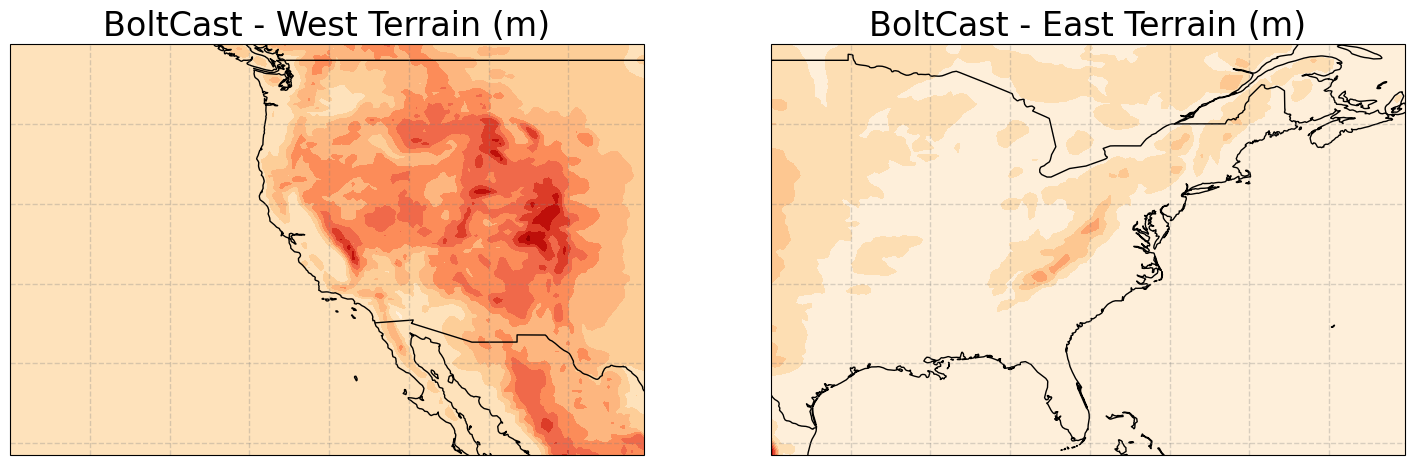

In [ ]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(1,2,1, projection=ccrs.PlateCarree())
temp_cbar = ax.contourf(bcw_lons,boltCast_lat_1d,subset_w,cmap='OrRd',transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, edgecolor="black")
ax.add_feature(cfeature.BORDERS,edgecolor="black")
gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=1, color='gray', alpha=0.3, linestyle='--')
ax.set_title('BoltCast - West Terrain (m)',fontsize=24)

ax = fig.add_subplot(1,2,2, projection=ccrs.PlateCarree())
temp_cbar = ax.contourf(bce_lons,boltCast_lat_1d,subset_e,cmap='OrRd',transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, edgecolor="black")
ax.add_feature(cfeature.BORDERS,edgecolor="black")
gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  linewidth=1, color='gray', alpha=0.3, linestyle='--')
ax.set_title('BoltCast - East Terrain (m)',fontsize=24)

plt.savefig('splitBoltCastGrid.png')

In [7]:
##test select
gfs_file = '/ourdisk/hpc/ai2es/bmac87/GFS/00Z/f072.nc'

ds = xr.open_dataset(gfs_file,engine='netcdf4')
ds

<xarray.Dataset> Size: 2GB
Dimensions:       (time: 355, lat: 104, lon: 320)
Coordinates:
  * lon           (lon) float64 3kB 220.0 220.2 220.5 ... 299.2 299.5 299.8
  * lat           (lat) float64 832B 50.0 49.75 49.5 49.25 ... 24.75 24.5 24.25
Dimensions without coordinates: time
Data variables: (12/17)
    graupel_250   (time, lat, lon) float64 95MB ...
    graupel_500   (time, lat, lon) float64 95MB ...
    graupel_700   (time, lat, lon) float64 95MB ...
    ice_250       (time, lat, lon) float64 95MB ...
    ice_500       (time, lat, lon) float64 95MB ...
    ice_700       (time, lat, lon) float64 95MB ...
    ...            ...
    snow_700      (time, lat, lon) float64 95MB ...
    w_500         (time, lat, lon) float64 95MB ...
    w_700         (time, lat, lon) float64 95MB ...
    reflectivity  (time, lat, lon) float64 95MB ...
    cape          (time, lat, lon) float64 95MB ...
    lifted_index  (time, lat, lon) float64 95MB ...
Attributes:
    description:         Inputs into BoltCast.
    mixing_ratio_units:  kg/kg
    refl_units:          dB
    cape_units:          J/kg
    lifted_index_units:  K
    w_units:             m/s

In [ ]:
static_inputs = pickle.load(open('static_inputs.pkl','rb'))
gfs_data = pickle.load(open('/scratch/bmac87/dataset/test/f000_xr_norm_r0.pkl','rb'))

features = gfs_data['norm_features']
binary_ltg  = gfs_data['binary_ltg'].values
time = gfs_data['time'].values
channels = gfs_data['n_channel'].values

fig_idx=0
print(channels)
print(time[fig_idx])
lat = gfs_data['lat']
lon = gfs_data['lon']

lat2d = static_inputs['lat']
lon2d = static_inputs['lon']
terrain = static_inputs['terrain']

nrows=7
ncols=3
fig = plt.figure()


for i, channel in enumerate(channels):
    print(i,channel)
    data = features[fig_idx,:,:,i]
    if i<=20:
        ax = fig.add_subplot(nrows,ncols,i+1, projection=ccrs.PlateCarree())
        cb = ax.pcolormesh(lon,lat,data,transform=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE, edgecolor="black")
        ax.add_feature(cfeature.STATES,edgecolor="black")
        ax.set_title(channel,fontsize=8)
        plt.colorbar(cb,ax=ax)

ax = fig.add_subplot(nrows,ncols,21, projection=ccrs.PlateCarree())
cb = ax.pcolormesh(lon,lat,binary_ltg[fig_idx,:,:],transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, edgecolor="black")
ax.add_feature(cfeature.STATES,edgecolor="black")
ax.set_title('binary_ltg',fontsize=8)
plt.colorbar(cb,ax=ax)
plt.savefig('inputs.pdf')
plt.savefig('inputs.png')